In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_0.csv", index_col="OD_id")

In [3]:
pred_df

,start_vertex,end_vertex,distance,lam_w,P_w,l_w,e_w
OD_id,,,,,,,
0,521,791,4500,0.011072,0.636520,4758.890839,1916.044607
1,676,379,6500,0.018230,0.798438,6731.485411,3608.024575
2,889,385,11500,0.011753,0.868223,11809.062029,5567.234712
3,255,722,14500,0.012086,0.869774,14770.004276,6160.339755
4,403,481,7500,0.012837,0.689249,7747.061176,2781.998393
...,...,...,...,...,...,...,...
995,125,557,13000,0.018451,0.939380,13338.856721,7288.057973
996,135,820,14000,0.013445,0.671289,14182.671239,5280.444052
997,800,89,16500,0.020503,0.823911,16728.483066,4545.153841


In [4]:
pred_ride_dist = np.sum(pred_df['lam_w'] * (pred_df["l_w"] - pred_df['e_w'] / 2))

In [5]:
simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_0.csv")

In [6]:
simu_df

,start_vertex,end_vertex,original_distance,num,matching_num,matching_probability,shared_distance,final_distance
0,521,791,4500,348,230,0.66,1977.01,4770.11
1,676,379,6500,568,464,0.82,3893.49,6720.07
2,889,385,11500,369,319,0.86,5705.96,11798.10
3,255,722,14500,374,339,0.91,6382.35,14775.40
4,403,481,7500,365,240,0.66,2810.96,7724.66
...,...,...,...,...,...,...,...,...
995,125,557,13000,581,547,0.94,7292.60,13316.70
996,135,820,14000,380,263,0.69,5355.26,14221.05
997,800,89,16500,586,490,0.84,4892.49,16733.79
998,42,523,8500,470,401,0.85,5009.57,8814.89


In [7]:
simu_ride_dist = np.sum((simu_df['final_distance'] - simu_df['shared_distance'] / 2) * simu_df['num']) / 30000

In [8]:
pred_ride_dist, simu_ride_dist

(130474.40790062746, 130224.91722733334)

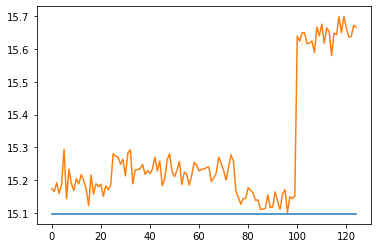

In [22]:
value = []
for i in range(125):
    pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_{:.0f}.csv".format(i), index_col="OD_id")
    pred_ride_dist = np.sum(pred_df['lam_w'])
    simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_{:.0f}.csv".format(i))
    simu_ride_dist = np.sum(simu_df['num']) / 30000
    value.append([pred_ride_dist, simu_ride_dist])
plt.plot(np.array(value))
plt.show()

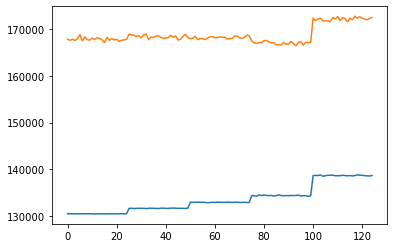

In [18]:
value = []
for i in range(125):
    pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_{:.0f}.csv".format(i), index_col="OD_id")
    pred_ride_dist = np.sum(pred_df['lam_w'] * (pred_df["l_w"] - pred_df['e_w'] / 2))
    simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_{:.0f}.csv".format(i))
    simu_ride_dist = np.sum((simu_df['final_distance'] - simu_df['shared_distance'] / 2) * simu_df['num']) / 30000
    value.append([pred_ride_dist, simu_ride_dist])
plt.plot(np.array(value))
plt.show()

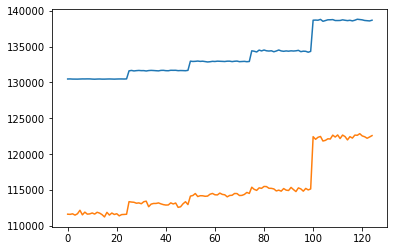

In [16]:
plt.plot(value)
plt.show()

In [11]:
value = np.array(value)
np.sqrt(np.sum((value[:,0]-value[:,1])**2) / 125)

43934.79265883646

In [12]:
pd.DataFrame(np.abs(value[:,0]-value[:,1])).describe()

,0
count,125.000000
mean,43931.869068
std,508.879018
min,43216.117387
25%,43566.916726
50%,43756.935200
75%,44110.457616
max,45132.342978


In [13]:
100 * (np.sum(np.abs(value[:,0]-value[:,1]) / value[:,1]) / 125)

49.03634890332858

In [14]:
pd.DataFrame(np.abs(value[:,0]-value[:,1]) / value[:,1] * 100).describe()

,0
count,125.000000
mean,49.036349
std,1.714050
min,45.229266
25%,49.271365
50%,49.702043
75%,50.084338
max,50.779702
